In [1]:
import random 
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as elemTree

In [2]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, category_id_to_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    class_name = category_id_to_name[class_name[0]]
    x_min, y_min, w, h = bbox[0]
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

In [3]:
class_id = {'person' : 0, 'bird' : 1, 'cat' : 2 , 'cow' : 3 , 'dog' : 4 , 'horse' :  5, 'sheep' : 6,'aeroplane' : 7, 
                    'bicycle' : 8 , 'boat' : 9, 'bus' : 10, 'car' : 11, 'motorbike' : 12, 'train' : 13,
                    'bottle' : 14, 'chair' : 15, 'diningtable' : 16, 'pottedplant' : 17, 'sofa' : 18, 'tvmonitor' : 19}

id_class = {0 : 'person', 1 : 'bird', 2 : 'cat' , 3 : 'cow', 4 : 'dog', 5 : 'horse', 6 :'sheep', 7 : 'aeroplane', 
                    8 : 'bicycle', 9 : 'boat', 10 : 'bus', 11 : 'car', 12 : 'motorbike', 13 : 'train',
                    14 : 'bottle', 15 : 'chair', 16 : 'diningtable', 17 : 'pottedplant', 18 : 'sofa', 19 : 'tvmonitor'}

In [4]:
image = cv2.imread("image/1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
category = []
bboxes = []

annotation = elemTree.parse("image/1.xml")
root = annotation.getroot()
for obj in root.iter("object"):
    box = []
    category.append(class_id[obj.findtext("name")])
    box.append(float(obj.find("bndbox").findtext("xmin")))
    box.append(float(obj.find("bndbox").findtext("ymin")))
    box.append(float(obj.find("bndbox").findtext("xmax")))
    box.append(float(obj.find("bndbox").findtext("ymax")))
    bboxes.append(box)

In [5]:
trans_dict = {}

trans_dict["HorizontalFlip"] = A.Compose(
    [A.HorizontalFlip(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["VerticalFlip"] = A.Compose(
    [A.VerticalFlip(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["RandomBrightness"] = A.Compose(
    [A.RandomBrightness(p=0.3, always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["RandomBrightnessContrast"] = A.Compose(
    [A.RandomBrightnessContrast(p=0.3, always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["RandomContrast"] = A.Compose(
    [A.RandomContrast(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["RandomFog"] = A.Compose(
    [A.RandomFog(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["CenterCrop"] = A.Compose(
    [A.CenterCrop(128, 128)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["Rotate"] = A.Compose(
    [A.Rotate(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["Color jitter"] = A.Compose(
    [A.ColorJitter(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["Downscale"] = A.Compose(
    [A.Downscale(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["GaussianBlur"] = A.Compose(
    [A.GaussianBlur(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["FancyPCA"] = A.Compose(
    [A.FancyPCA(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["RandomShadow "] = A.Compose(
    [A.FancyPCA(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

trans_dict["R + CC"] = A.Compose(
    [A.CenterCrop(128, 128),
    A.Rotate(always_apply = True)],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

In [6]:
def dict_generator(trans_dict):
    for key in trans_dict.keys():
        yield key
parameters = {'axes.titlesize': 35}
plt.rcParams.update(parameters)

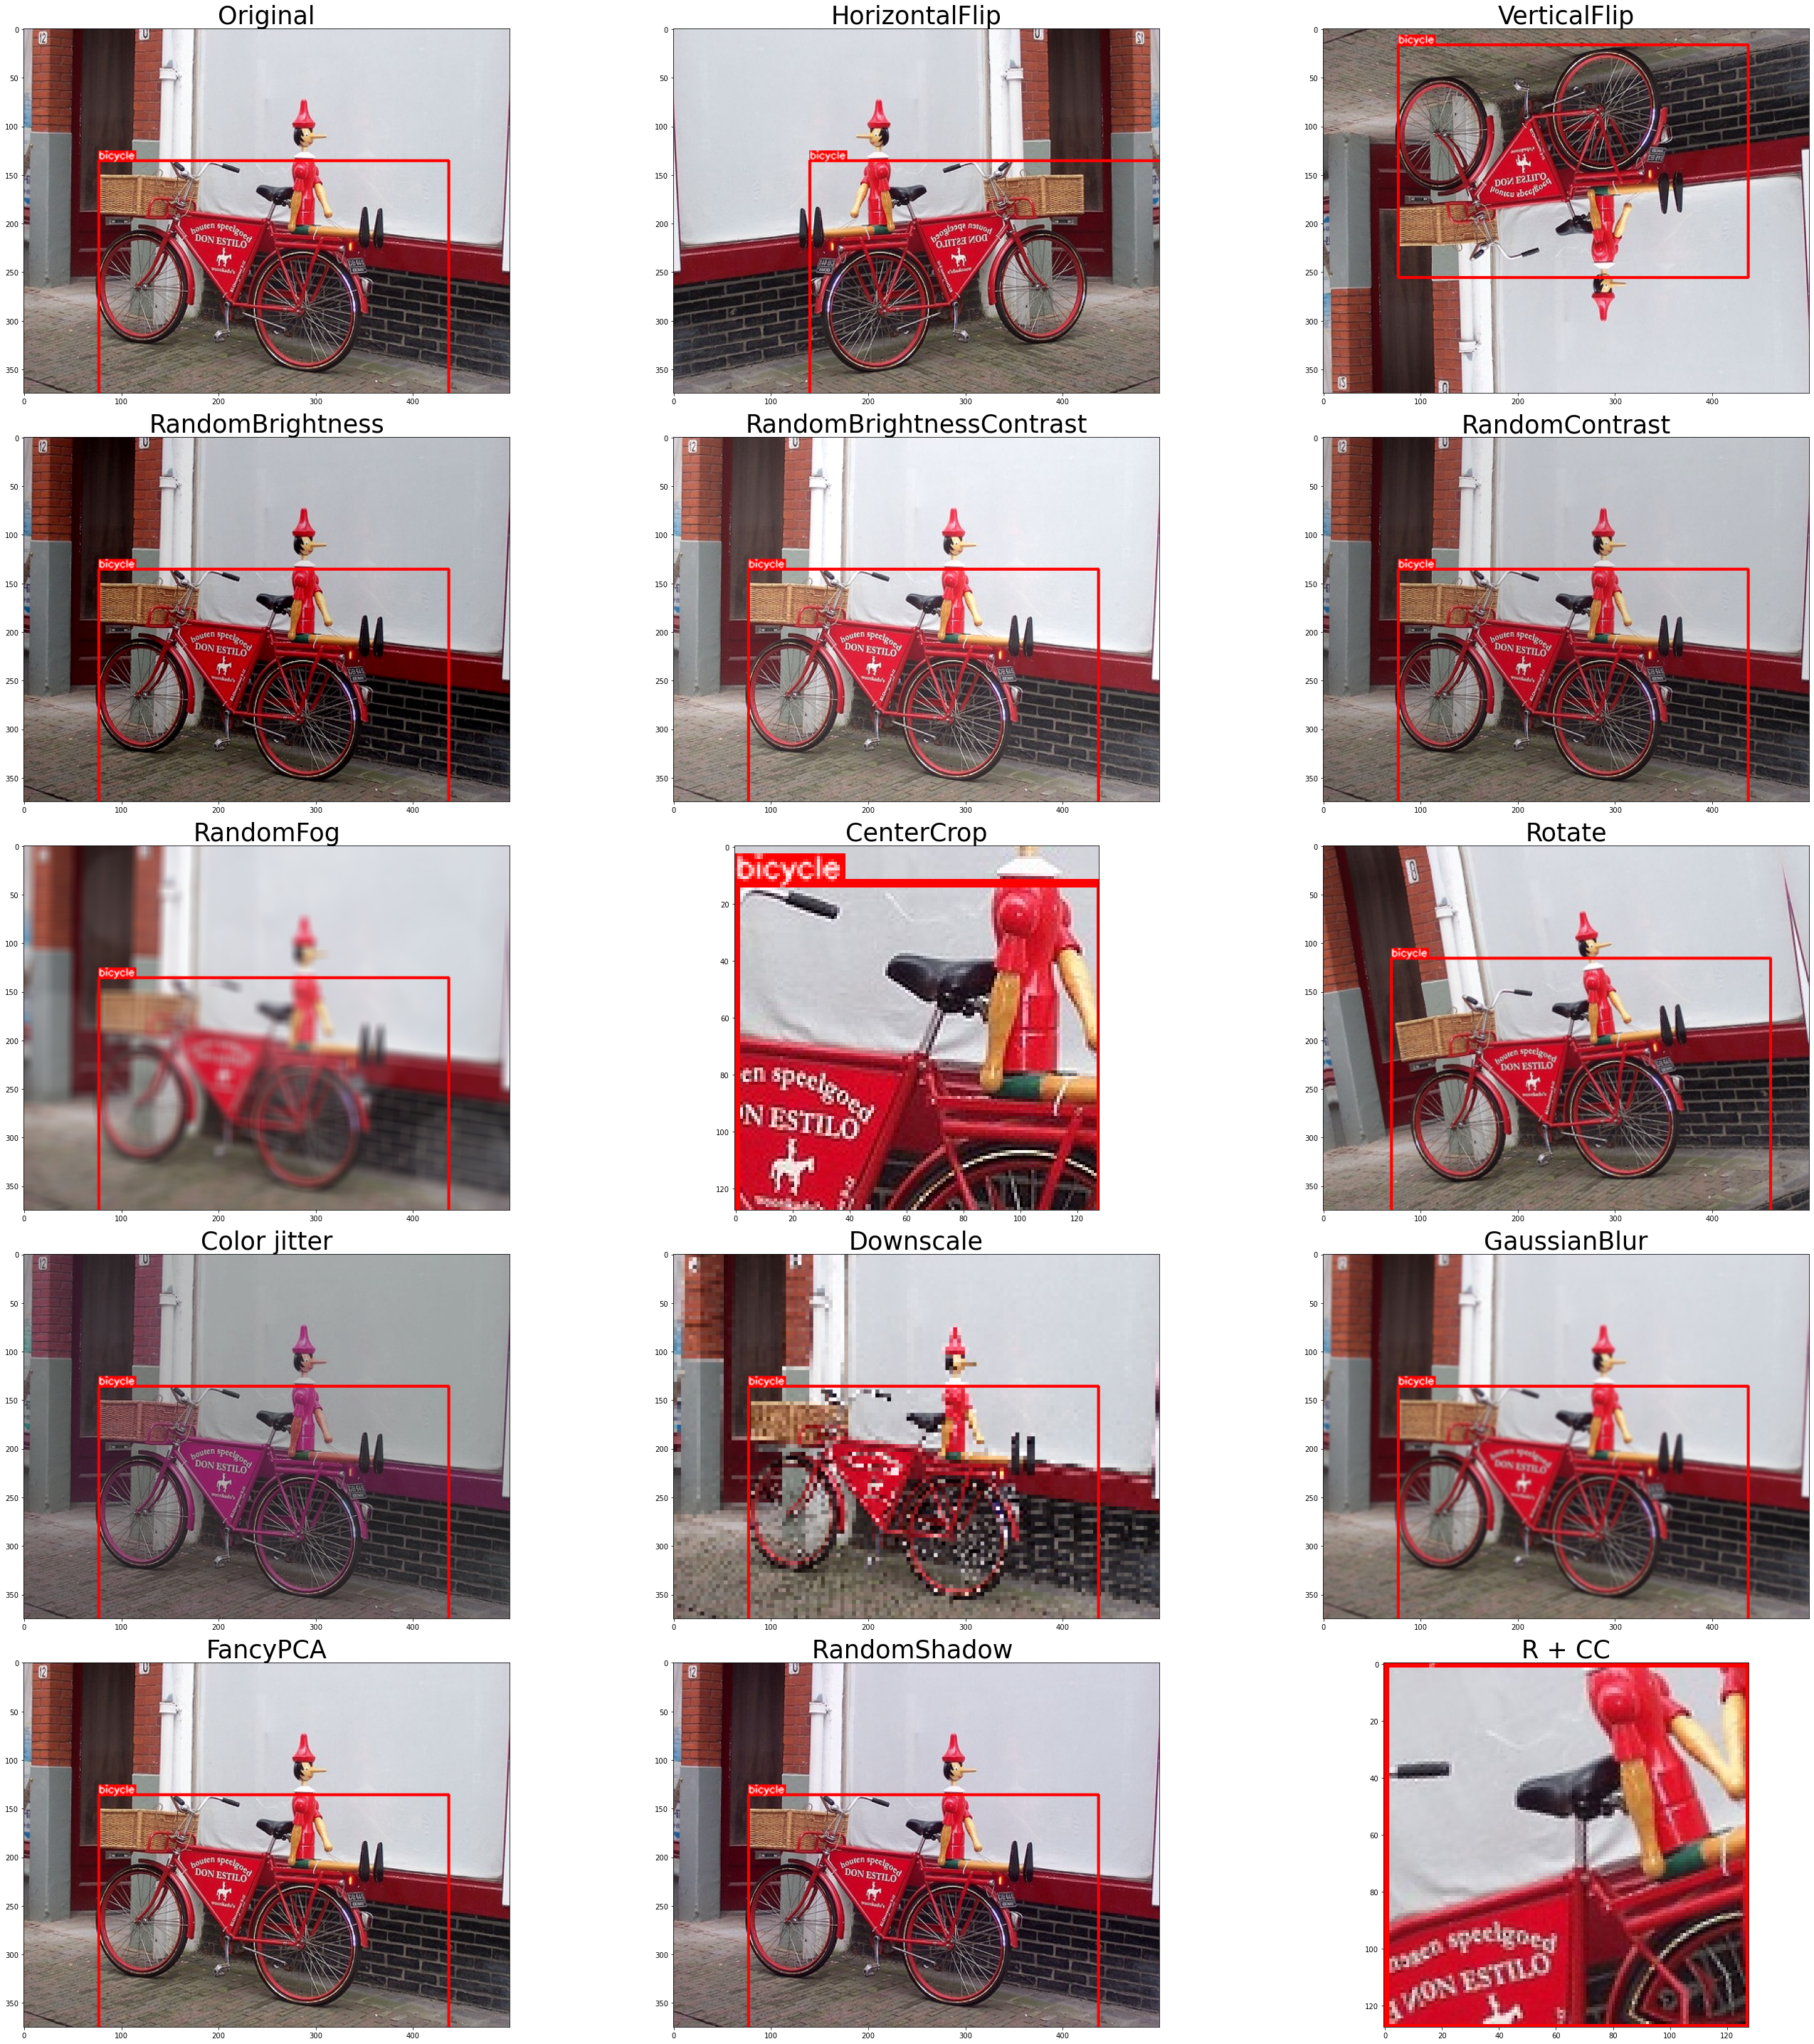

In [7]:
row = 5
col = 3
axes = []
fig = plt.figure()
x = 40
y = 40
fig.set_figwidth(x)
fig.set_figheight(y)
g = dict_generator(trans_dict)
for idx in range(row * col):
    draw_img = image.copy()
    if idx == 0 :
        draw_img = visualize_bbox(draw_img, bboxes, category, id_class)
        axes.append(fig.add_subplot(row, col, idx + 1))
        subplot_title = "Original"
    else :
        subplot_title = next(g)
        transform = trans_dict[subplot_title]
        after_trans = transform(image = draw_img, bboxes = bboxes, category_ids = category)
        draw_img = visualize_bbox(after_trans["image"], after_trans["bboxes"], after_trans["category_ids"], id_class)
        axes.append(fig.add_subplot(row, col, idx + 1))
    axes[-1].set_title(subplot_title)
    plt.imshow(draw_img)

fig.tight_layout()
plt.show()